# Machine Learning Foundation

## Section 2, Part a: Regression Intro: Transforming Target


## Learning objectives

By the end of this lesson, you will be able to:

* Apply transformations to make target variable more normally distributed for regression
* Apply inverse transformations to be able to use these in a regression context


In [14]:
!pip install -U scikit-learn
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 75.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In the following cell we load the data and define some useful plotting functions.


### Loading in Boston Data


In [39]:
data_url = "./BostonHousing.csv"

In [48]:
boston_data = pd.read_csv(data_url, encoding='utf-8')

In [49]:
boston_data.head(15)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


### Determining Normality


Making our target variable normally distributed often will lead to better results

If our target is not normally distributed, we can apply a transformation to it and then fit our regression to predict the transformed values.

How can we tell if our target is normally distributed? There are two ways:

* Visually
* Using a statistical test


#### Visually


Plotting a histogram:


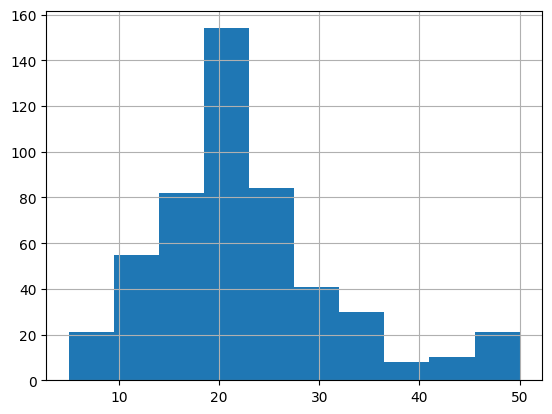

In [52]:
boston_data.medv.hist()
plt.show()

Does not look normal due to that right tail. Let's try to verify statistically:


In [53]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

Without getting into Bayesian vs. frequentist debates, the following will suffice:

* This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say:
    * This test outputs a "p-value". The _higher_ this p-value is the _closer_ the distribution is to normal.
    * Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.


In [55]:
normaltest(boston_data.medv.values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

p-value _extremely_ low. Our y variable we've been dealing with this whole time was not normally distributed!


Linear Regression assumes a normally distributed residuals which can be aided by transforming y variable. Let's try some common transformations to try and get y to be normally distributed:

* Log
* Square root
* Box cox


### Testing log


The log transform can transform data that is significantly skewed right to be more normally distributed:


In [57]:
def plot_exponential_data():
    data = np.exp(np.random.normal(size=1000))
    plt.hist(data)
    plt.show()
    return data

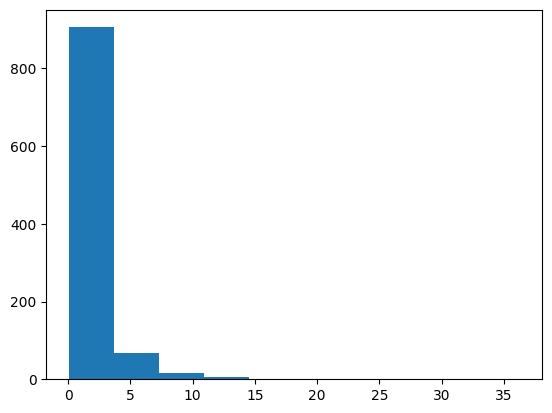

In [58]:
data = plot_exponential_data()

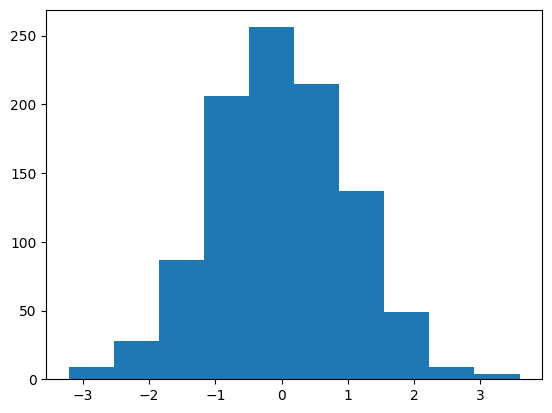

In [59]:
plt.hist(np.log(data));

**Apply transform to Boston data:**


In [61]:
log_medv = np.log(boston_data.medv)

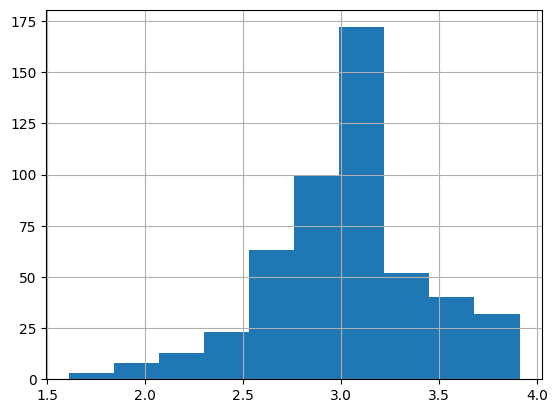

In [62]:
log_medv.hist();

In [63]:
normaltest(log_medv)

NormaltestResult(statistic=17.21801696640698, pvalue=0.00018245472768345196)

Conclusion: closer, but still not normal.


### Exercise:

The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data:


In [64]:
def plot_square_normal_data():
    data = np.square(np.random.normal(loc=5, size=1000))
    plt.hist(data)
    plt.show()
    return data

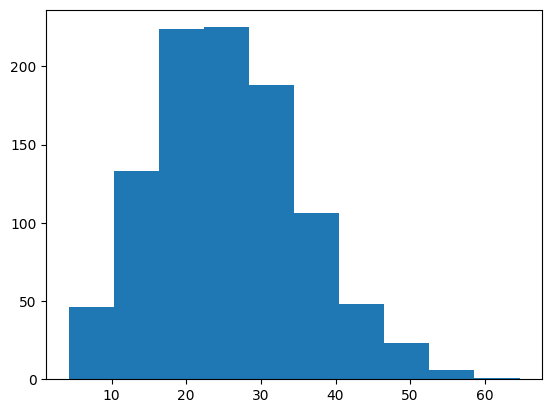

In [65]:
data = plot_square_normal_data()

Slightly skewed right.


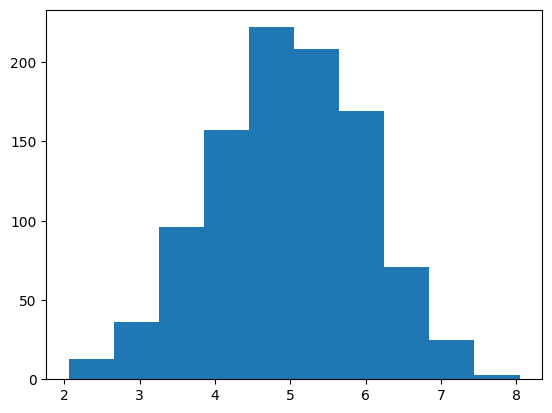

In [66]:
plt.hist(np.sqrt(data));

Apply the square root transformation to the Boston data target and test whether the result is normally distributed.


In [67]:
sqrt_medv = np.sqrt(boston_data.medv)

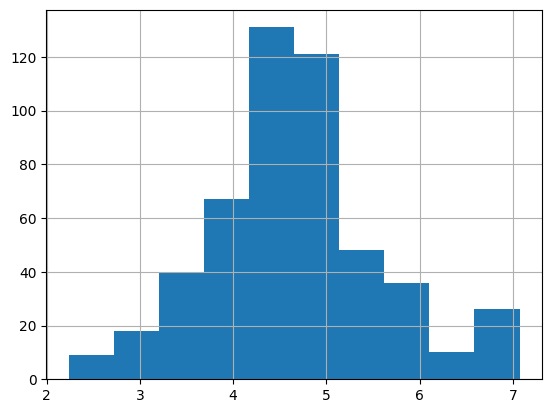

In [68]:
sqrt_medv.hist();

In [69]:
normaltest(sqrt_medv)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

### Box cox


The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.


In [70]:
from scipy.stats import boxcox

In [72]:
bc_result = boxcox(boston_data.medv)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [73]:
len(bc_result)

2

In [74]:
lam

0.2166209012915364

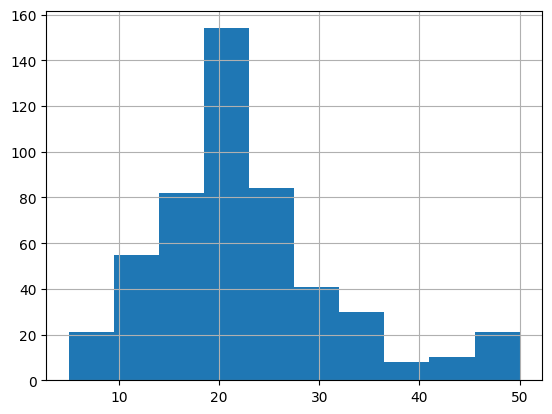

In [75]:
boston_data['medv'].hist();

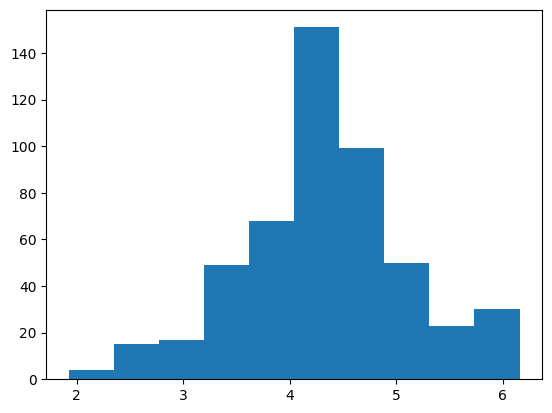

In [76]:
plt.hist(boxcox_medv);

In [77]:
normaltest(boxcox_medv)

NormaltestResult(statistic=4.513528775533045, pvalue=0.1046886692817602)

Significantly more normally distributed (according to p value) than the other two distributions - above 0.05, even!

Now that we have a normally distributed y-variable, let's try a regression!


### Testing regression:


Prepare the data for a linear regression task by separating the features and the target variable.

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler,
                                   PolynomialFeatures)

In [79]:
lr = LinearRegression()

**Reload clean version of `boston_data`:**


In [80]:
boston_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Same steps as before.


**Create X and y**


In [81]:
y_col = "medv"

X = boston_data.drop(y_col, axis=1)
y = boston_data[y_col]

In [82]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [83]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

**Create Polynomial Features**


The purpose of adding polynomial features is to capture potential non-linear relationships between the original features and the target variable. By including polynomial terms, the model can learn more complex relationships between the inputs and outputs.

In [84]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [88]:
X.shape

(506, 13)

In [87]:
X_pf.shape

(506, 104)

**Train test split**


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3,
                                                    random_state=72018)

In [90]:
X_train.shape

(354, 104)

**Fit `StandardScaler` on `X_train` as before**


In [91]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [92]:
X_train_s.shape

(354, 104)

**Discuss: what transformation do we need to apply next?**

Apply the appropriate transformation.


In [93]:
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

In [94]:
y_train_bc

array([4.8625686 , 6.0629177 , 4.51310411, 4.81957899, 4.95725428,
       5.77277497, 5.41197088, 5.75640624, 3.72665146, 4.94686892,
       5.75640624, 4.80874112, 3.92225296, 4.58384068, 4.78695477,
       6.64804017, 3.77300722, 2.91446761, 3.99405229, 5.37557157,
       2.91446761, 5.14858214, 3.37830364, 5.61413692, 4.46503222,
       6.62861276, 3.53307611, 3.78829063, 4.6643901 , 4.74293114,
       4.76501893, 4.58384068, 6.66093826, 4.90499278, 4.72068886,
       5.1583522 , 3.30653002, 3.15681299, 4.6070669 , 6.0021158 ,
       7.02952208, 4.6870301 , 3.78829063, 5.05933485, 4.19940562,
       4.93645035, 6.30368143, 7.02952208, 5.65657858, 4.54867373,
       4.59547537, 4.6070669 , 4.8411456 , 5.37557157, 3.93675676,
       4.22573738, 4.6070669 , 4.47712066, 4.54867373, 5.61413692,
       4.93645035, 2.39638821, 4.88385027, 3.6795137 , 5.08935167,
       4.78695477, 6.22513995, 4.92599831, 6.02503476, 4.10535832,
       4.4284788 , 4.59547537, 5.51012859, 3.51631095, 5.05933

In [95]:
lam2

0.2751714409758365

As before, we'll now:

1. Fit regression
1. Transform testing data
1. Predict on testing data


In [96]:
y_train_bc.shape

(354,)

In [97]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

In [98]:
X_test_s.shape

(152, 104)

### Discussion

* Are we done?
* What did we predict?
* How would you interpret these predictions?


#### Inverse transform


Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:


In [ ]:
from scipy.special import inv_boxcox

In [ ]:
# code from above
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [ ]:
inv_boxcox(boxcox_medv, lam)[:10]

In [ ]:
boston_data['MEDV'].values[:10]

Exactly the same, as we would hope!


### Exercise:

1. Apply the appropriate inverse transformation to `y_pred_bc`.
2. Calculate the $R^2$ using the result of this inverse transformation and `y_test`.  

**Hint:** Should be two lines of code.


In [ ]:
pass # your code here

In [ ]:
# Instructor Solution
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_pred_tran,y_test)

## LAB Exercise:

### Determine the R^2 of a LinearRegression without the box cox transformation. Is it higher or lower?


In [ ]:
### BEGIN SOLUTION
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(lr_pred,y_test)
### END SOLUTION

---
### Machine Learning Foundation (C) 2020 IBM Corporation
